In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from tensorflow.keras.utils import plot_model

In [2]:
csv_file_names = ['UNSW-NB15_1.csv',
                 'UNSW-NB15_2.csv',
                 'UNSW-NB15_3.csv',
                 'UNSW-NB15_4.csv']
dfs = []
for file_name in csv_file_names:
    df = pd.read_csv(file_name, header= None)
    dfs.append(df)

df = pd.concat(dfs, axis = 0,  ignore_index= True)
df

C:\Users\aryan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\aryan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [3]:
features = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')
features.columns

Index(['No.', 'Name', 'Type ', 'Description'], dtype='object')

In [4]:
df.columns = features['Name']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [5]:
df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [6]:
df.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

### Data Cleaning

In [7]:
df['Label'].value_counts()

0    2218764
1     321283
Name: Label, dtype: int64

In [8]:
df['attack_cat'].isnull().sum()

2218764

In [9]:
df['attack_cat'] = df['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())

In [10]:
df['attack_cat'].value_counts()

normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             1795
shellcode            1511
backdoors             534
worms                 174
Name: attack_cat, dtype: int64

In [11]:
df['attack_cat'] = df['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [12]:
df['attack_cat'].value_counts()

normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: attack_cat, dtype: int64

In [13]:
df.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [14]:
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].fillna(value=0)
df['is_ftp_login'].value_counts()

0.0    1066593
1.0      43389
4.0        156
2.0         30
Name: is_ftp_login, dtype: int64

In [15]:
df['is_ftp_login'] = df['is_ftp_login'].fillna(value=0)
df['is_ftp_login'].value_counts()

0.0    2496472
1.0      43389
4.0        156
2.0         30
Name: is_ftp_login, dtype: int64

In [16]:
df['is_ftp_login'] = np.where(df['is_ftp_login']>1, 1, df['is_ftp_login'])
df['is_ftp_login'].value_counts()

0.0    2496472
1.0      43575
Name: is_ftp_login, dtype: int64

In [17]:
df.isnull().sum()

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_ds

In [18]:
df['service'].value_counts()

-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: service, dtype: int64

In [19]:
df['service'] = df['service'].apply(lambda x:"None" if x=='-' else x)
df['service'].value_counts()

None        1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: service, dtype: int64

In [20]:
df['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3, '0', '1', ' ', '2', '4'], dtype=object)

In [21]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)
df['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3])

In [22]:
df[['service','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','attack_cat','Label']]

Name,service,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,attack_cat,Label
0,dns,0.0,0.0,0,normal,0
1,None,0.0,0.0,0,normal,0
2,dns,0.0,0.0,0,normal,0
3,dns,0.0,0.0,0,normal,0
4,dns,0.0,0.0,0,normal,0
...,...,...,...,...,...,...
2540042,ftp-data,0.0,0.0,0,normal,0
2540043,ftp,0.0,1.0,2,normal,0
2540044,ftp,0.0,1.0,2,normal,0
2540045,http,2.0,0.0,0,normal,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [24]:
def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)
    
    num=df._get_numeric_data()
    num[num<0]=0
    
    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

In [25]:
data_cleaning(df)

Dataset Shape:  (2540047, 49)
Zero Variance Columns:  []  are dropped!!
Shape after removing the zero variance columns:  (2540047, 49)


In [26]:
df.drop(columns=['srcip','sport','dstip','dsport','Label'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 44 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   sloss             int64  
 8   dloss             int64  
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             int64  
 13  Dpkts             int64  
 14  swin              int64  
 15  dwin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smeansz           int64  
 19  dmeansz           int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  Sjit              float64
 23  Djit              float64
 24  Stime             int64  
 25  Ltime             int64  
 26  Sintpkt       

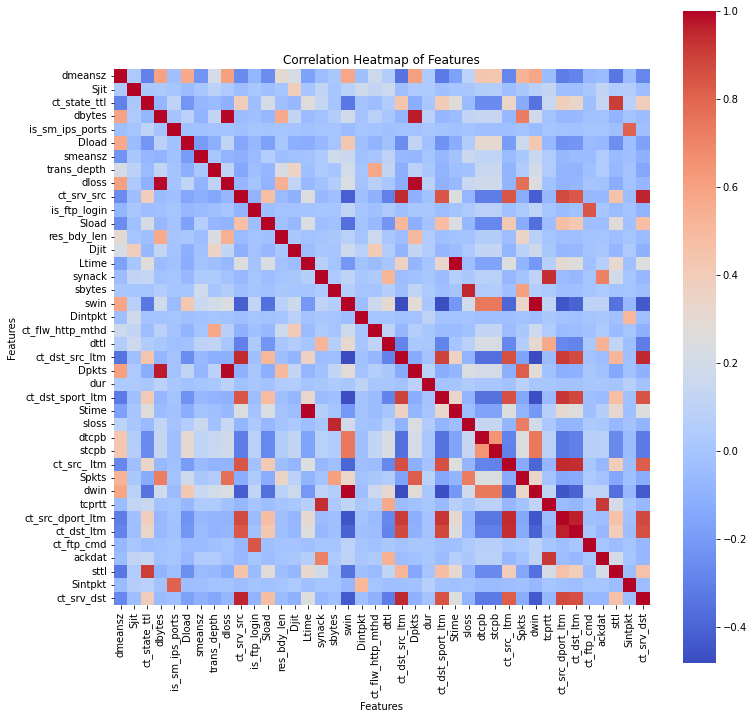

In [27]:
cat_col = ['proto', 'service', 'state']
num_col = list(set(df.columns) - set(cat_col))

correlation_matrix = df[num_col].corr()


plt.figure(figsize=(12, 12))  


sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap of Features')

# Rotate x-axis labels for better readability with many features
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()


### Data Normalization

In [28]:
std_scaler = MinMaxScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = df.select_dtypes(include='number').columns
df = standardization(df,numeric_col)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 44 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            float64
 4   dbytes            float64
 5   sttl              float64
 6   dttl              float64
 7   sloss             float64
 8   dloss             float64
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             float64
 13  Dpkts             float64
 14  swin              float64
 15  dwin              float64
 16  stcpb             float64
 17  dtcpb             float64
 18  smeansz           float64
 19  dmeansz           float64
 20  trans_depth       float64
 21  res_bdy_len       float64
 22  Sjit              float64
 23  Djit              float64
 24  Stime             float64
 25  Ltime             float64
 26  Sintpkt       

In [30]:
# label encoding (0,1,2,3,4,5,6,7,8,9) multi-class labels (analysis,backdoor,dos,exploits,fuzzers,generic,normal,reconnaissance,shellcode,worms)
attack = pd.DataFrame(df.attack_cat)

le2 = preprocessing.LabelEncoder()
enc_label = attack.apply(le2.fit_transform)
df['intrusion'] = enc_label
print(df.shape)
df
df.info()

(2540047, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 45 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            float64
 4   dbytes            float64
 5   sttl              float64
 6   dttl              float64
 7   sloss             float64
 8   dloss             float64
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             float64
 13  Dpkts             float64
 14  swin              float64
 15  dwin              float64
 16  stcpb             float64
 17  dtcpb             float64
 18  smeansz           float64
 19  dmeansz           float64
 20  trans_depth       float64
 21  res_bdy_len       float64
 22  Sjit              float64
 23  Djit              float64
 24  Stime             float64
 25  Ltime             float64
 26  

In [31]:
df.drop(columns=['attack_cat'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 44 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            float64
 4   dbytes            float64
 5   sttl              float64
 6   dttl              float64
 7   sloss             float64
 8   dloss             float64
 9   service           object 
 10  Sload             float64
 11  Dload             float64
 12  Spkts             float64
 13  Dpkts             float64
 14  swin              float64
 15  dwin              float64
 16  stcpb             float64
 17  dtcpb             float64
 18  smeansz           float64
 19  dmeansz           float64
 20  trans_depth       float64
 21  res_bdy_len       float64
 22  Sjit              float64
 23  Djit              float64
 24  Stime             float64
 25  Ltime             float64
 26  Sintpkt       

In [32]:
# OneHotEncoding on categorical features

df = pd.get_dummies(df,columns=cat_col,prefix="",prefix_sep="")  
print(df.shape)

(2540047, 205)


### Train-Test Split

In [33]:
y= df['intrusion']
X= df.drop(labels=['intrusion'], axis=1)

In [34]:
X = X.astype(np.float32)
y = y.astype(np.float32)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(2032037, 204) 
 (508010, 204)


In [36]:
#selecting 1% of random rows for better running time

X_train = X_train.sample(frac=0.1, replace=True, random_state=1)
y_train = y_train.sample(frac=0.1, replace=True, random_state=1)
X_test = X_test.sample(frac=0.1, replace=True, random_state=1)
y_test = y_test.sample(frac=0.1, replace=True, random_state=1)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(203204, 204) (203204,)
(50801, 204) (50801,)


In [37]:
#from sklearn.preprocessing import LabelBinarizer
#y_train = LabelBinarizer().fit_transform(y_train)
#y_test =  LabelBinarizer().fit_transform(y_test)

In [38]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

X_train.columns

features = X_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

<IPython.core.display.Javascript object>

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'dtcpb', 'smeansz', 'dmeansz', 'Sjit', 'Djit',
       'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'udp', 'None',
       'dns', 'INT'],
      dtype='object')
34
[5.23541953e-03 1.12179595e-01 2.42342259e-02 1.54517564e-01
 3.33252329e-02 6.57763370e-03 4.78760180e-03 5.55848776e-02
 1.35288211e-02 9.09204048e-03 1.50159683e-02 4.58467421e-03
 1.24057175e-03 4.19341572e-03 6.53745630e-03 1.08127800e-01
 2.85701778e-02 1.08505892e-03 1.07111965e-03 6.97061628e-03
 4.98306332e-03 1.12781952e-02 1.13915118e-02 1.10155483e-02
 5.71954905e-03 1.43820727e-02 1.77120578e-02 1.40395859e-02
 2.52265812e-04 1.10826280e-01 1.08276277e-03 6.34619503e-05
 6.87865016e-05 1.92786804e-02 2.27928222e-02 1.17896745e-02
 1.24152930e-02 1.

In [40]:
X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

In [42]:
from sklearn.preprocessing import LabelBinarizer
y_train = LabelBinarizer().fit_transform(y_train)
y_test =  LabelBinarizer().fit_transform(y_test)

In [43]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train_rfc, ( X_train_rfc.shape[0], 1 , X_train_rfc.shape[1] ))
X_test = np.reshape(X_test_rfc, ( X_test_rfc.shape[0], 1,  X_test_rfc.shape[1] ))

In [44]:
model = Sequential() # initializing model
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train_rfc.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=10,activation='softmax'))

In [45]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# summary of model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             25344     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3

In [47]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100


33/33 [==============================] - 9s 108ms/step - loss: 1.9218 - accuracy: 0.8498 - val_loss: 1.0377 - val_accuracy: 0.8747
Epoch 2/100
33/33 [==============================] - 4s 119ms/step - loss: 0.6991 - accuracy: 0.8732 - val_loss: 0.5105 - val_accuracy: 0.8747
Epoch 3/100
33/33 [==============================] - 5s 156ms/step - loss: 0.4519 - accuracy: 0.8732 - val_loss: 0.3761 - val_accuracy: 0.8747
Epoch 4/100
33/33 [==============================] - 5s 156ms/step - loss: 0.3392 - accuracy: 0.8732 - val_loss: 0.2890 - val_accuracy: 0.8751
Epoch 5/100
33/33 [==============================] - 4s 131ms/step - loss: 0.2792 - accuracy: 0.8805 - val_loss: 0.2412 - val_accuracy: 0.8718
Epoch 6/100
33/33 [==============================] - 4s 132ms/step - loss: 0.2136 - accuracy: 0.9326 - val_loss: 0.1623 - val_accuracy: 0.9481
Epoch 7/100
33/33 [==============================] - 4s 127ms/step - loss: 0.1597 - accuracy: 0.9481 - val_loss: 0.1367 - val_accuracy: 0.95

Epoch 55/100
33/33 [==============================] - 4s 124ms/step - loss: 0.0842 - accuracy: 0.9696 - val_loss: 0.0775 - val_accuracy: 0.9717
Epoch 56/100
33/33 [==============================] - 4s 126ms/step - loss: 0.0839 - accuracy: 0.9698 - val_loss: 0.0771 - val_accuracy: 0.9721
Epoch 57/100
33/33 [==============================] - 4s 127ms/step - loss: 0.0831 - accuracy: 0.9696 - val_loss: 0.0767 - val_accuracy: 0.9719
Epoch 58/100
33/33 [==============================] - 4s 128ms/step - loss: 0.0829 - accuracy: 0.9698 - val_loss: 0.0764 - val_accuracy: 0.9719
Epoch 59/100
33/33 [==============================] - 4s 128ms/step - loss: 0.0824 - accuracy: 0.9696 - val_loss: 0.0761 - val_accuracy: 0.9723
Epoch 60/100
33/33 [==============================] - 4s 126ms/step - loss: 0.0821 - accuracy: 0.9698 - val_loss: 0.0759 - val_accuracy: 0.9724
Epoch 61/100
33/33 [==============================] - 4s 125ms/step - loss: 0.0817 - accuracy: 0.9699 - val_loss: 0.0753 - val_accuracy:

In [48]:
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

1588/1588 [==============================] - 6s 4ms/step - loss: 0.0732 - accuracy: 0.9722
Test results - Loss: 0.07316319644451141 - Accuracy: 97.22249507904053%
